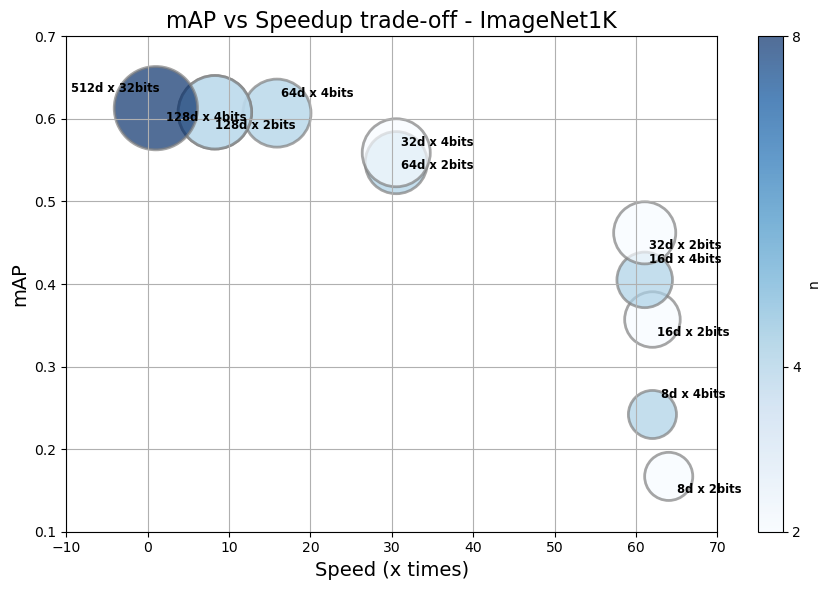

In [108]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the given LaTeX tabular data
data = {
    "Bits_d_times_n": [16, 32, 32, 64, 64, 128, 128, 256, 256, 512, 16384],
    "mAP": [0.354, 0.379, 0.461, 0.585, 0.598, 0.709, 0.721, 0.739, 0.741, 0.741, 0.745],
    "Speed": [62.73, 59.08, 59.08, 30.55, 30.55, 16.13, 16.13, 8.90, 8.90, 4.71, 1.00],
    'd': [8, 8, 16, 16, 32, 32, 64, 64, 128, 128, 512],
    'n': [2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 8],
}
df = pd.DataFrame(data)
df["d_times_n"] = df["Bits_d_times_n"].apply(lambda x: f"{x}")
df["d_times_n"] = df["d"].astype(str) + "d x " + df["n"].astype(str) + "bits"
df['bubble_size'] = df['d'].apply(lambda x: np.log2(x))

new_data = {
    "Bits_d_times_n": [16, 32, 32, 64, 64, 128, 128, 256, 256, 512, 16384],
    "mAP": [0.167, 0.242, 0.357, 0.405, 0.462, 0.547, 0.559, 0.607, 0.608, 0.608, 0.613],
    "Speed": [64.03, 62.03, 62.03, 61.08, 61.08, 30.54, 30.54, 15.88, 8.25, 8.25, 1.00],
    'd': [8, 8, 16, 16, 32, 32, 64, 64, 128, 128, 512],
    'n': [2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 8],
}
df = pd.DataFrame(new_data)
df["d_times_n"] = df["Bits_d_times_n"].apply(lambda x: f"{x}")
df["d_times_n"] = df["d"].astype(str) + "d x " + df["n"].astype(str) + "bits"
df['bubble_size'] = df['d'].apply(lambda x: np.log2(x))


# Plotting the bubble plot
plt.figure(figsize=(9, 6))

# plt.scatter(df['Speed'], df['mAP'], s=df['bubble_size']*400, c=df['n'], cmap="Reds", alpha=0.4, edgecolors="grey", linewidth=2)
plt.scatter(df['Speed'], df['mAP'], s=df['bubble_size']*400, c=df['n'], cmap="Blues", alpha=0.7, edgecolors="grey", linewidth=2)

# Adding texts to the bubbles
for i in range(len(df)- 2):
    if df['n'][i] == 2:
        plt.text(df["Speed"][i]+ 5, df["mAP"][i] - .02, df["d_times_n"][i], 
             horizontalalignment='center', size='small', color='black', weight='semibold')
    elif df['n'][i] == 4:
        plt.text(df["Speed"][i]+ 5, df["mAP"][i] + .02, df["d_times_n"][i], 
             horizontalalignment='center', size='small', color='black', weight='semibold')

plt.text(df["Speed"][len(df)-2]- 1, df["mAP"][len(df)-2] - .01, df["d_times_n"][len(df)-2], 
        horizontalalignment='center', size='small', color='black', weight='semibold')
plt.text(df["Speed"][len(df)-1]- 5, df["mAP"][len(df)-1] + .02, '512d x 32bits', 
        horizontalalignment='center', size='small', color='black', weight='semibold')


plt.title('mAP vs Speedup trade-off - ImageNet1K', fontsize=16)
plt.xlabel('Speed (x times)', fontsize=14)
plt.ylabel('mAP', fontsize=14)
plt.colorbar(label='n', ticks=[2, 4, 8])
# plt.ylim(0.3, 0.8)
# plt.xlim(-10, 70)
plt.xlim(-10, 70)
plt.ylim(0.1, 0.7)
plt.grid(True)
plt.tight_layout()
plt.savefig('mAP_vs_Speedup_trade-off.pdf')
plt.show()